# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [111]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [112]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: What is the distribution of card types among customers who close their account versus those who don't?



**Answer**: Based on this overview, it's evident that among customers who terminated their accounts, there was a higher proportion of blue cardholders compared to silver or gold cardholders. Nevertheless, among currently active customers, the prevalence of blue cardholders is still higher, though the contrast is less stark than in closed accounts. This implies that the type of card alone might not be a decisive factor in account closure, given the presence of active customers with different card types. Other variables likely influence decisions regarding account closure.

## Supporting Analysis

In [113]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.


# A tibble: 6 × 3
# Groups:   customer_status [2]
  customer_status card_type count
  <fct>           <fct>     <int>
1 closed_account  blue       1497
2 closed_account  silver      296
3 closed_account  gold        299
4 active          blue       1054
5 active          silver      872
6 active          gold        609


`summarise()` has grouped output by 'card_type'. You can override using the
`.groups` argument.


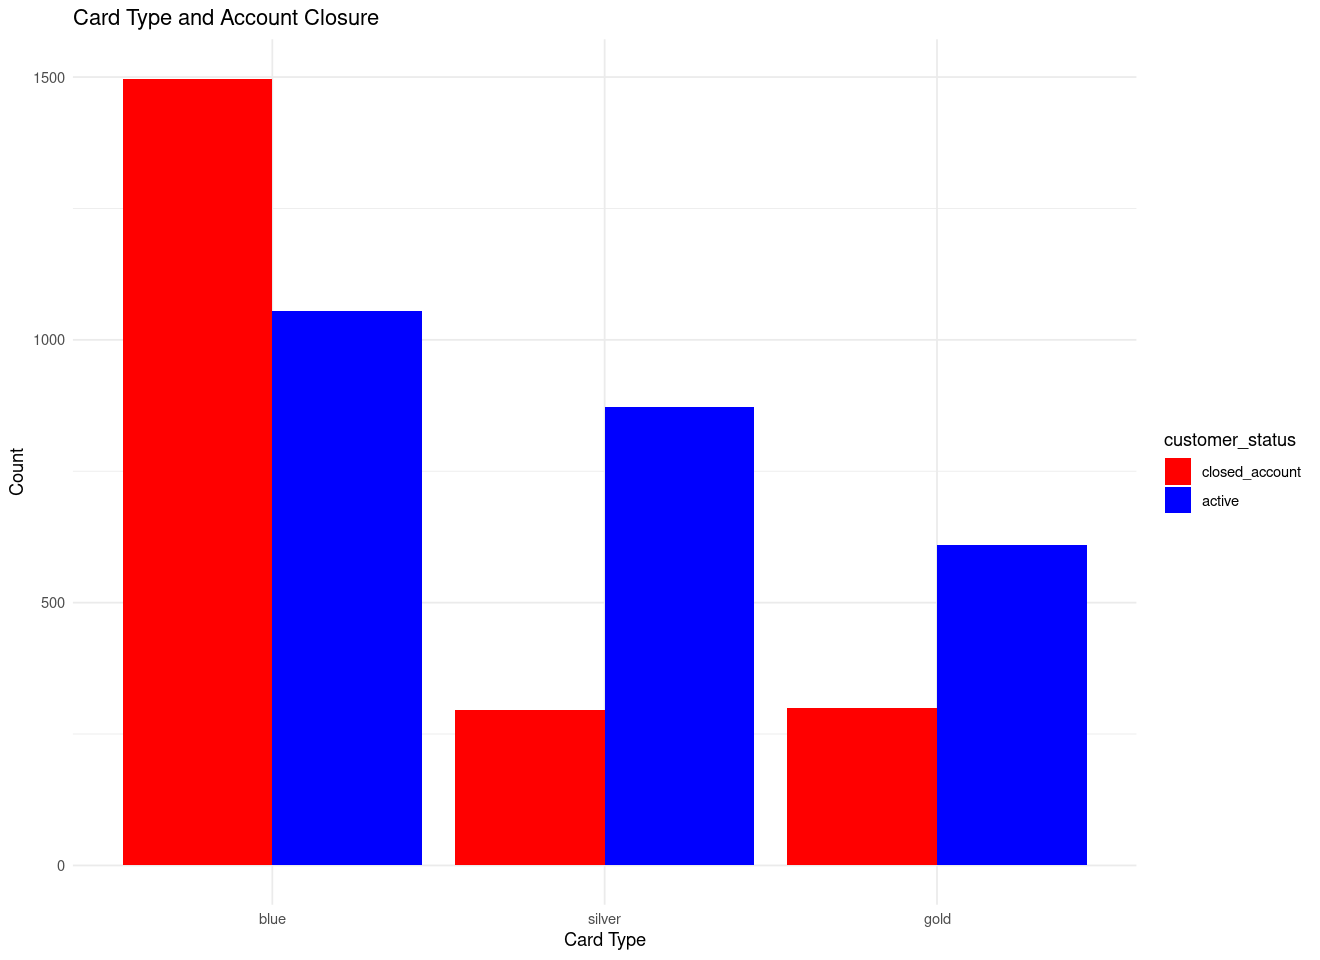

In [114]:
# Summary analysis
cardType <- credit_card_df %>%
  group_by(customer_status, card_type) %>%
  summarise(count = n())

# Display summary data frame
print(cardType)

# Graphical analysis
Comparison <- credit_card_df %>%
  group_by(card_type, customer_status) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = card_type, y = count, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Card Type and Account Closure",
       x = "Card Type",
       y = "Count") +
  scale_fill_manual(values = c("active" = "blue", "closed_account" = "red")) +
  theme_minimal()

# Display bar chart
print(Comparison)


## Question 2


**Question**: Do customers who were contacted more frequently last year tend to keep their accounts open?


**Answer**: In comparison to those who were contacted less frequently, consumers who were contacted more frequently last year were more likely to have an active account, according to this summary. For instance, among the consumers contacted twice, three times, and four times in the past year, there are more active accounts than closed accounts. It's crucial to remember that not all contact frequencies will show the same pattern, as there have been periods this year (e.g., 1, 5, and 6) when the number of closed accounts has exceeded the number of active accounts. Consequently, account closure decisions may also be influenced by other factors, even though there may be a general tendency.


## Supporting Analysis


`summarise()` has grouped output by 'contacted_last_year'. You can override
using the `.groups` argument.


# A tibble: 13 × 3
# Groups:   contacted_last_year [7]
   contacted_last_year customer_status count
                 <dbl> <fct>           <int>
 1                   0 closed_account      9
 2                   0 active            112
 3                   1 closed_account    134
 4                   1 active            409
 5                   2 closed_account    519
 6                   2 active            817
 7                   3 closed_account    875
 8                   3 active            800
 9                   4 closed_account    412
10                   4 active            370
11                   5 closed_account     72
12                   5 active             27
13                   6 closed_account     71


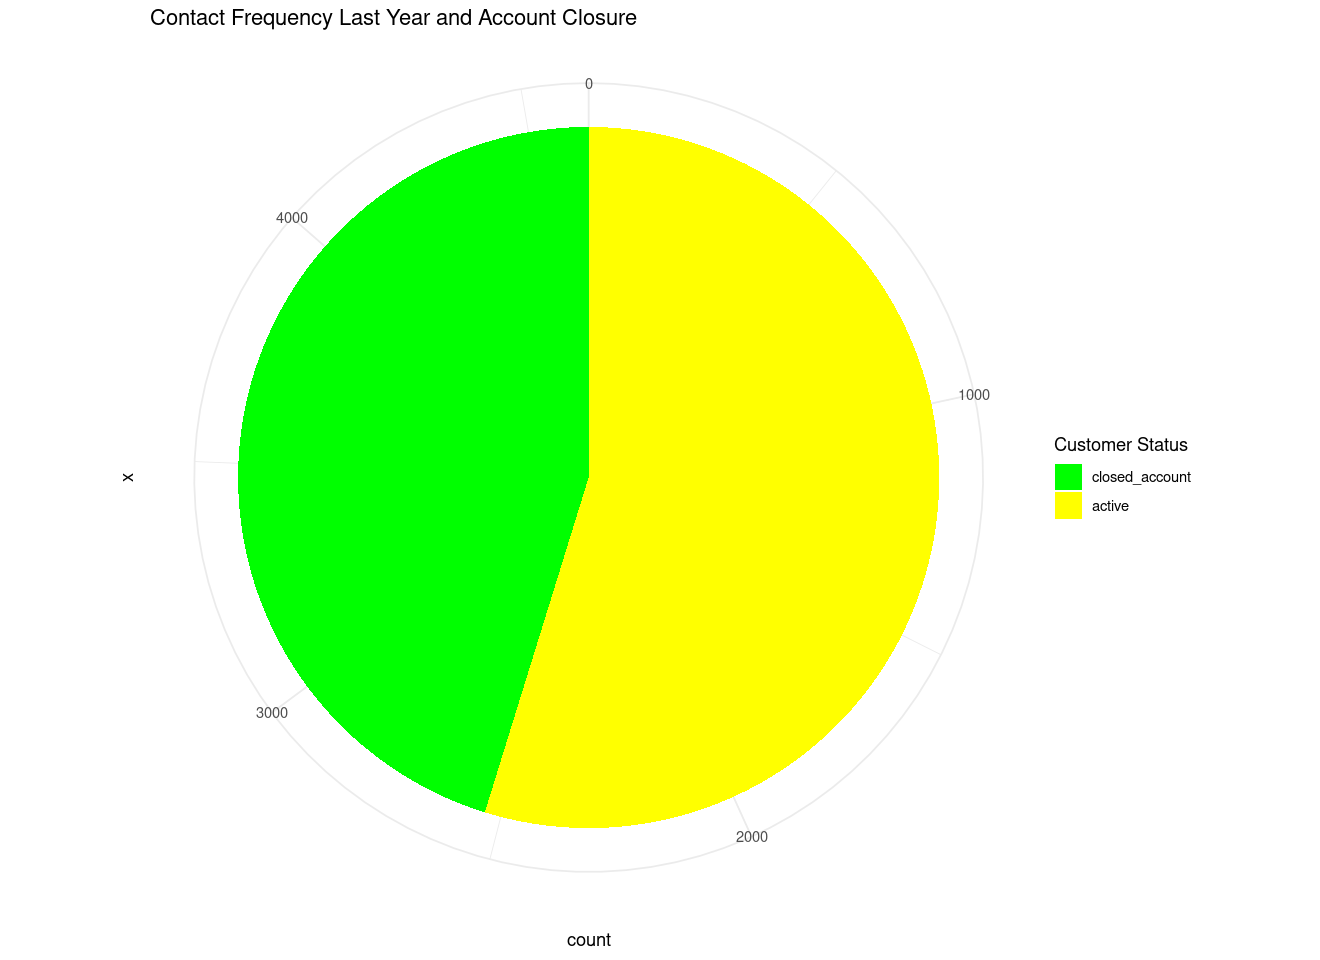

In [115]:
# Summary analysis
contactedLastYear <- credit_card_df %>%
  group_by(contacted_last_year, customer_status) %>%
  summarise(count = n())

# Display summary data frame
print(contactedLastYear)

# Pie chart
pieChart <- ggplot(contactedLastYear, aes(x = "", y = count, fill = customer_status)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Contact Frequency Last Year and Account Closure",
       fill = "Customer Status") +
  scale_fill_manual(values = c("active" = "yellow", "closed_account" = "green")) + # Setting custom colors
  theme_minimal() +
  theme(legend.position = "right")

# Display pie chart
print(pieChart)


## Question 3


**Question**: What is the average number of months since the first account for customers who close their accounts compared to those who don't?




**Answer**: We can observe from this summary that there is a small variation between customers who close their accounts and those who don't in the average number of months after the first account. As a whole, bank customers with closed accounts have been around for a little while longer than those with open accounts. The difference, nevertheless, is not very great, indicating that account closure may not be significantly influenced by the length of the customer's connection with the bank. Decisions on account closure may be influenced more by other variables.




## Supporting Analysis


# A tibble: 2 × 2
  customer_status avg_months_since_first_account
  <fct>                                    <dbl>
1 closed_account                            36.2
2 active                                    35.9


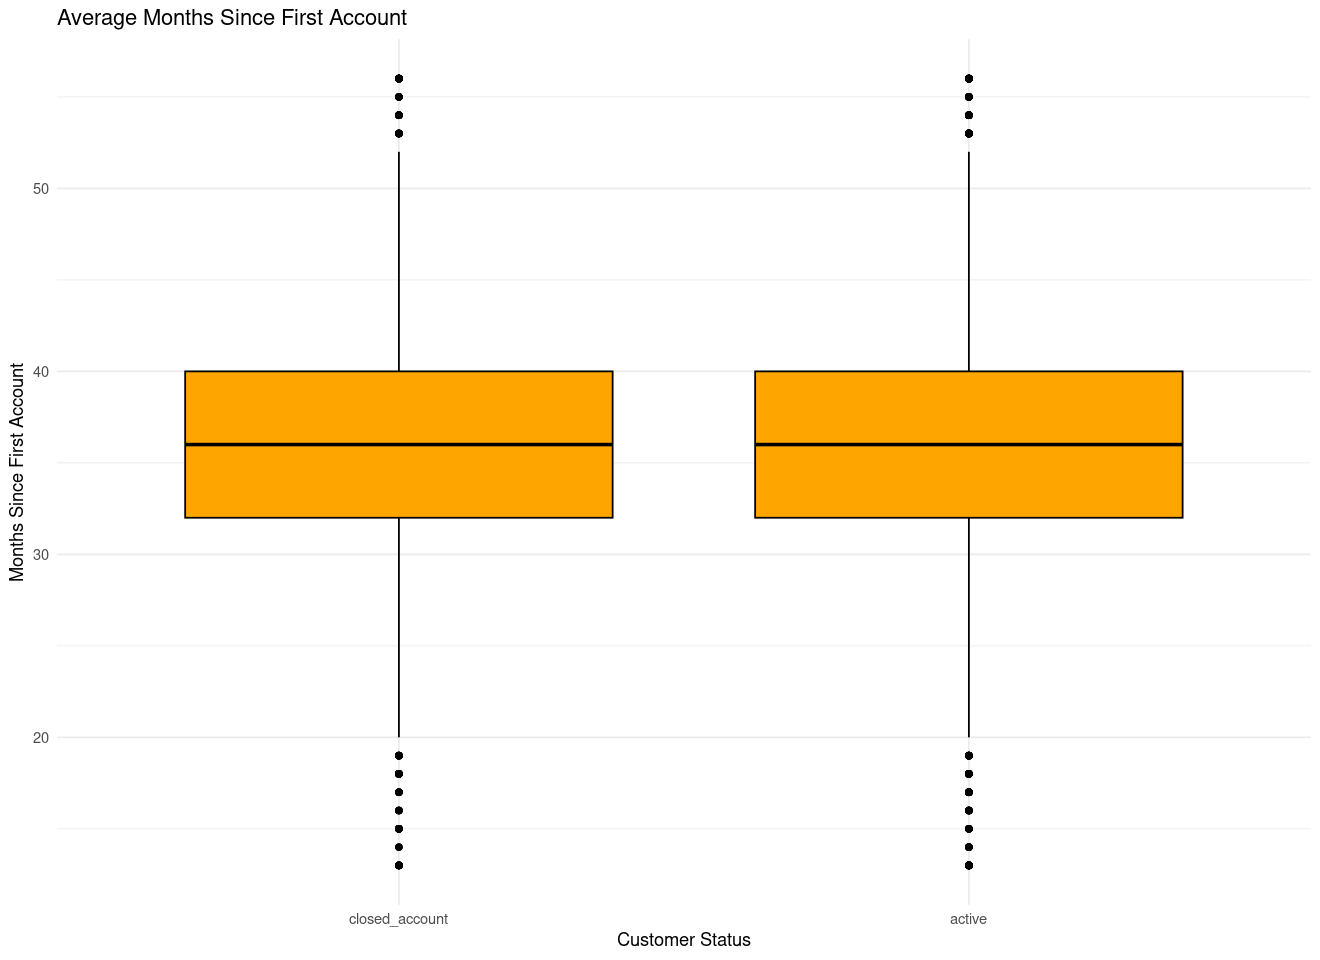

In [116]:
# Summary analysis
summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(avg_months_since_first_account = mean(months_since_first_account))

# Display summary data frame
print(summary)

# Graphical analysis
comparison <- credit_card_df %>%
  ggplot(aes(x = customer_status, y = months_since_first_account)) +
  geom_boxplot(fill = "orange", color = "black") + # Adding colors
  labs(title = "Average Months Since First Account",
       x = "Customer Status",
       y = "Months Since First Account") +
  theme_minimal()

# Display box plot
print(comparison)


## Question 4


**Question**: Do customers with a higher number of dependents tend to close their accounts more frequently?




**Answer**: As per the assessment, it is evident that there isn't a consistent pattern suggesting that clients with more dependents have a larger propensity to terminate their accounts. Although there are variations in the number of closed accounts between dependent counts, it doesn't seem that dependent count alone has a major role in account closure. Account closure decisions may also be influenced by other variables.



## Supporting Analysis


`summarise()` has grouped output by 'dependents'. You can override using the
`.groups` argument.


# A tibble: 12 × 3
# Groups:   dependents [6]
   dependents customer_status count
        <dbl> <fct>           <int>
 1          0 closed_account    178
 2          0 active            233
 3          1 closed_account    345
 4          1 active            475
 5          2 closed_account    521
 6          2 active            612
 7          3 closed_account    630
 8          3 active            693
 9          4 closed_account    336
10          4 active            413
11          5 closed_account     82
12          5 active            109


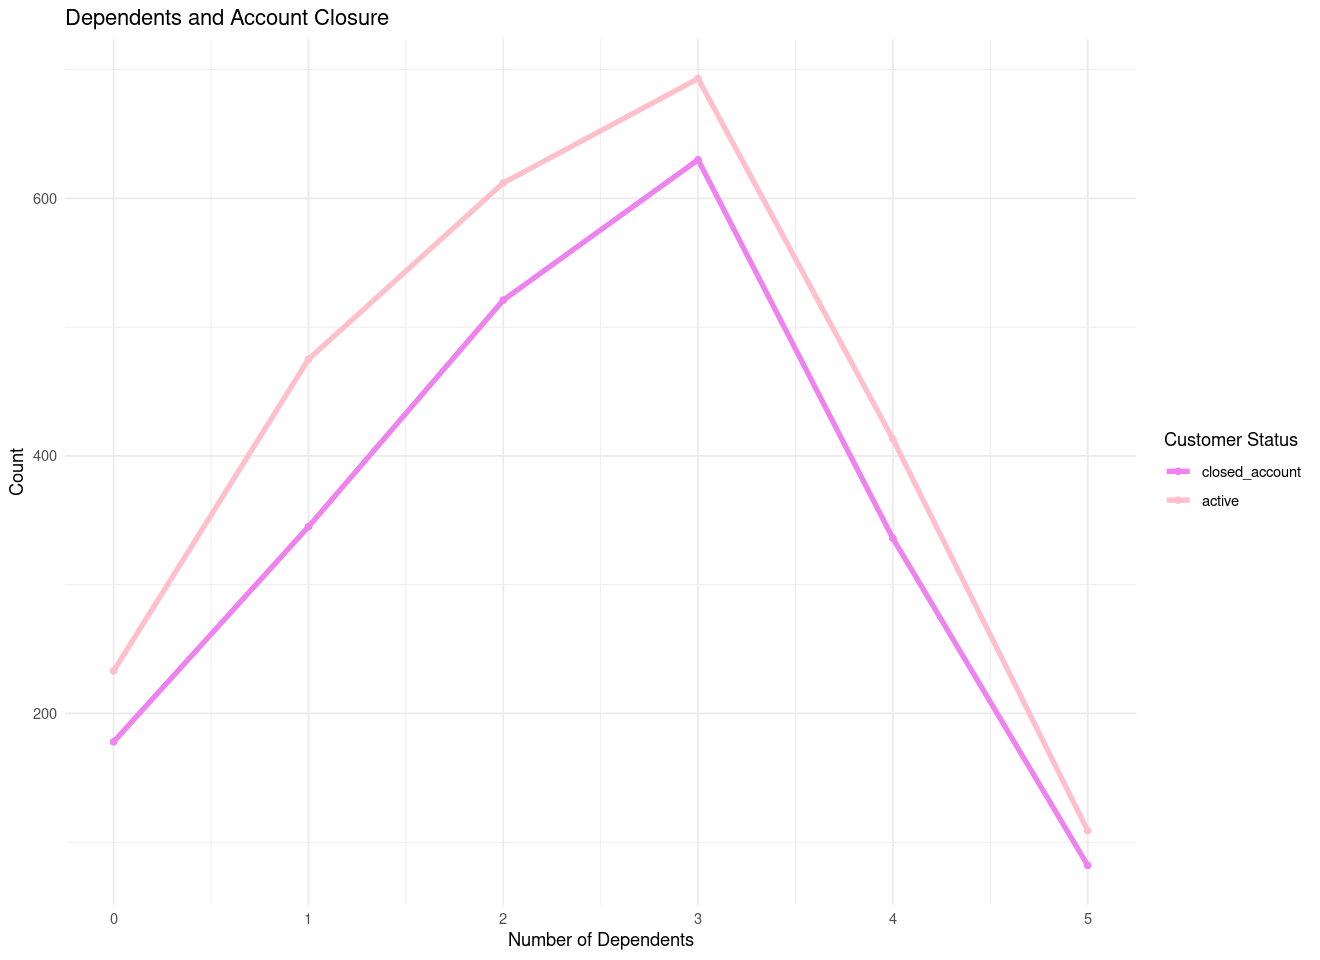

In [117]:
# Summary analysis
dependents <- credit_card_df %>%
  group_by(dependents, customer_status) %>%
  summarise(count = n())

# Display summary data frame
print(dependents)

# Line plot
linePlot <- ggplot(dependents, aes(x = dependents, y = count, color = customer_status)) +
  geom_line(size = 1.5) +  # Increased line thickness
  geom_point() +
  labs(title = "Dependents and Account Closure",
       x = "Number of Dependents",
       y = "Count",
       color = "Customer Status") +
  scale_color_manual(values = c("active" = "pink", "closed_account" = "violet")) +  # Setting custom colors
  theme_minimal()

# Display line plot
print(linePlot)


## Question 5


**Question**: How does the utilization ratio differ between customers who close their account and those who don't?



**Answer**: This summary reveals that customers who closed their accounts typically exhibit a lower average utilization ratio in comparison to those with active accounts. This hints at a potential association between utilization ratio and account closure, with lower ratios potentially signaling a heightened probability of closure. However, additional analysis is necessary to validate this correlation and delve into potential underlying causes.



## Supporting Analysis


# A tibble: 2 × 2
  customer_status avg_utilization_ratio
  <fct>                           <dbl>
1 closed_account                  0.161
2 active                          0.289


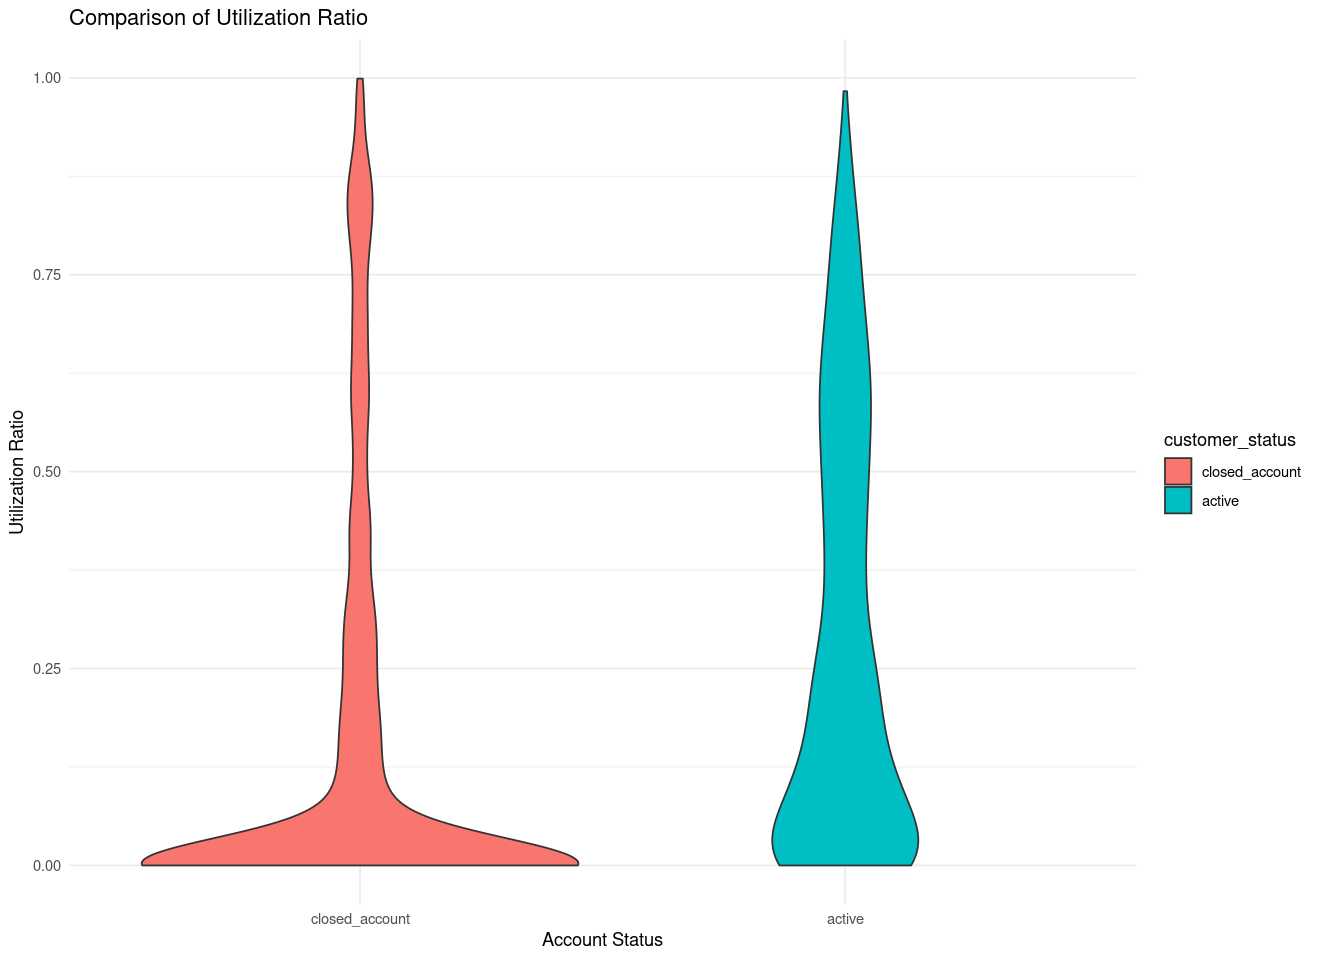

In [118]:
# Summary analysis
utilization_ratio_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(avg_utilization_ratio = mean(utilization_ratio))

# Display summary data frame
print(utilization_ratio_summary)

# Violin plot
violin_plot <- ggplot(credit_card_df, aes(x = customer_status, y = utilization_ratio, fill = customer_status)) +
  geom_violin() +
  labs(title = "Comparison of Utilization Ratio",
       x = "Account Status",
       y = "Utilization Ratio") +
  theme_minimal()

# Display violin plot
print(violin_plot)

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [119]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [120]:
library(tidymodels)
library(parsnip)
library(recipes)
library(yardstick)
library(ggplot2)

set.seed(123)

#Split data into training and test sets
data_split <- initial_split(credit_card_df, prop = 0.8, strata = "customer_status")
train_data <- training(data_split)
test_data <- testing(data_split)

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [122]:
#Feature engineering pipeline
credit_card_recipe <- recipe(customer_status ~ ., data = train_data) %>%
  step_dummy(all_nominal(), -all_outcomes()) %>%
  step_normalize(all_numeric(), -all_outcomes()) 

## Model 1 Training

In [124]:
# Logistic Regression
logistic_model <- logistic_reg() %>%
  set_engine("glm")

# Using the Feature engineering pipeline for the Logistic modeling workflow
logistic_model_workflow <- workflow() %>%
  add_recipe(credit_card_recipe) %>%
  add_model(logistic_model)

# Fitting the workflow to the training data
logistic_model_fit <- logistic_model_workflow %>%
  fit(data = train_data)

## Model 1 Performance Evaluation

.pred_closed_account,.pred_active,customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9815793258,0.018420674,closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
0.9885737819,0.011426218,closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
0.0006211283,0.999378872,active,46,4,masters,divorced,full_time,71585,gold,41,4,2,1,5397,0.433,0.670,4734,96,0.846
0.8709704605,0.129029540,closed_account,55,2,masters,married,self_employed,54037,blue,49,3,3,4,1809,0.000,0.569,2123,44,0.571
0.0194839550,0.980516045,active,47,1,associates,married,part_time,32071,gold,41,3,2,3,2950,0.557,0.800,4740,83,0.694
0.0029416614,0.997058339,active,56,1,masters,married,self_employed,35908,gold,50,4,3,2,1584,0.828,0.867,4203,73,0.780
0.6058235902,0.394176410,closed_account,49,4,masters,married,full_time,33543,gold,38,5,2,4,1757,0.000,0.890,2557,45,0.406
0.0123333753,0.987666625,active,52,4,associates,married,full_time,68316,blue,36,6,3,2,2597,0.670,0.710,5037,80,0.778
0.1453025870,0.854697413,active,50,2,bachelors,married,part_time,35351,blue,40,3,2,4,8416,0.184,0.643,13988,124,0.771


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9442695


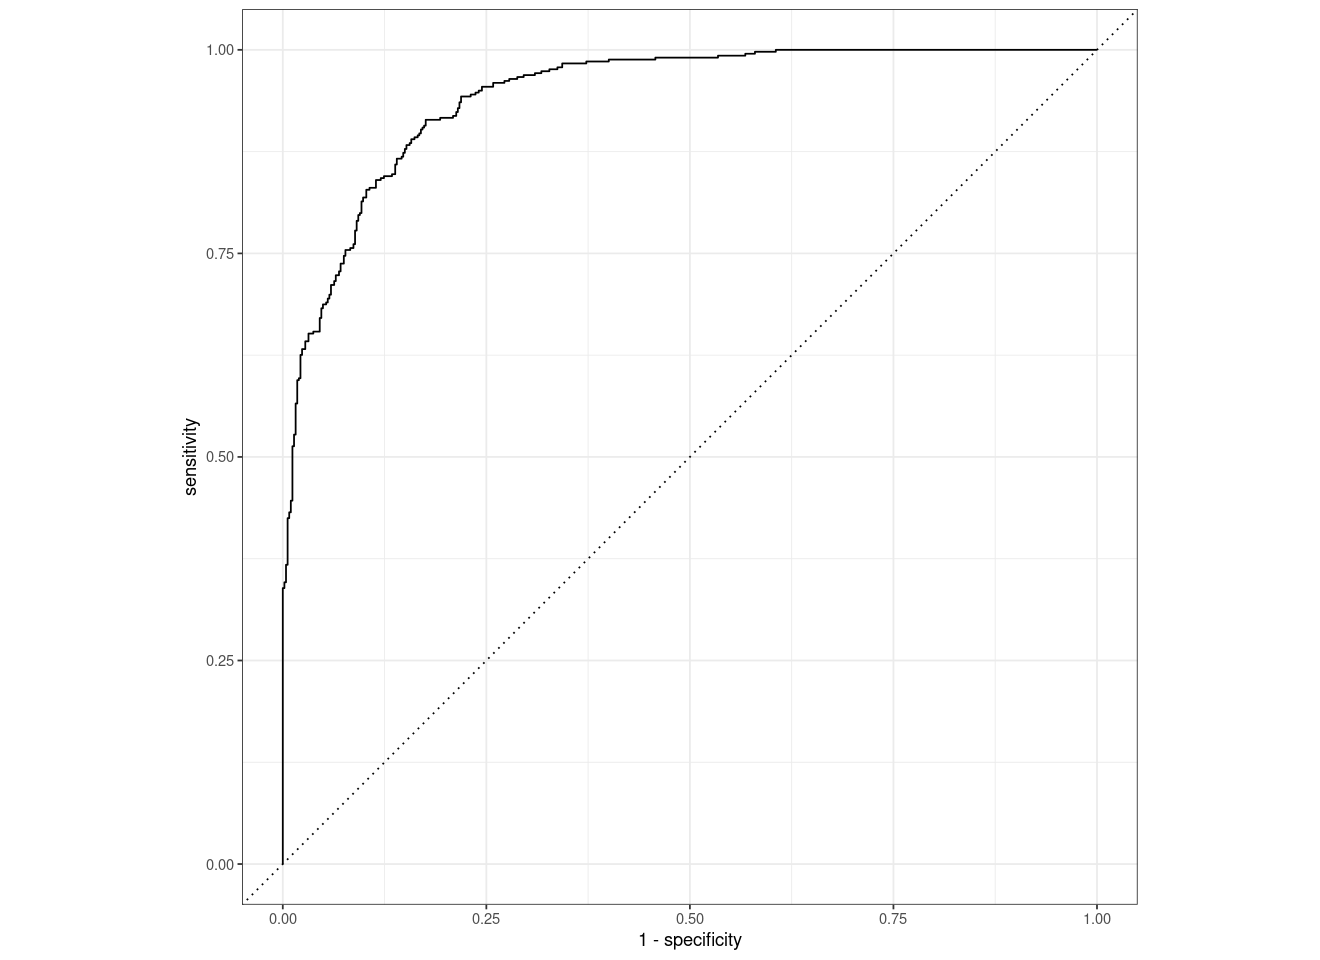

In [126]:
# Predict probabilities for each customer_status
logistic_predictions <- predict(logistic_model_fit, new_data = test_data, type = "prob") %>%
  bind_cols(test_data)
logistic_predictions
# Plotting the ROC curve
logistic_roc_curve <- roc_curve(logistic_predictions, truth = customer_status, .pred_closed_account) %>%
  autoplot()
logistic_roc_curve

# Calculating the Area under Curve
logistic_auc <- roc_auc(logistic_predictions, truth = customer_status, .pred_closed_account)
logistic_auc


In [127]:
# Train logistic regression model
logistic_model <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

logistic_workflow <- workflow() %>%
  add_recipe(credit_card_recipe) %>%
  add_model(logistic_model)

logistic_fit <- logistic_workflow %>%
  fit(data = train_data)

# Evaluate logistic regression model
logistic_predictions <- logistic_fit %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data)

# Precision
precision <- logistic_predictions %>%
  precision(truth = customer_status, estimate = .pred_class)

# Recall
recall <- logistic_predictions %>%
  recall(truth = customer_status, estimate = .pred_class)

# Accuracy
accuracy <- logistic_predictions %>%
  accuracy(truth = customer_status, estimate = .pred_class)

# F1 Score
f1_score <- logistic_predictions %>%
  f_meas(truth = customer_status, estimate = .pred_class)

# Sensitivity (True Positive Rate)
sensitivity <- logistic_predictions %>%
  sensitivity(truth = customer_status, estimate = .pred_class)

# Specificity (True Negative Rate)
specificity <- logistic_predictions %>%
  specificity(truth = customer_status, estimate = .pred_class)

# Confusion Matrix
conf_matrix <- logistic_predictions %>%
  conf_mat(truth = customer_status, estimate = .pred_class)

# Print the evaluation metrics
print(precision)
print(recall)
print(accuracy)
print(f1_score)
print(sensitivity)
print(specificity)
print(conf_matrix)




# A tibble: 1 × 3
  .metric   .estimator .estimate
  <chr>     <chr>          <dbl>
1 precision binary         0.831
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 recall  binary         0.869
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.861
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 f_meas  binary         0.849
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 sensitivity binary         0.869
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 specificity binary         0.854
                Truth
Prediction       closed_account active
  closed_account            364     74
  active                     55    433


## Model 2 Training

In [128]:
# Decision Tree Model
decision_tree_model <- decision_tree("classification") %>%
  set_engine("rpart")

# Using the Feature engineering pipeline for the Decision Tree workflow
decision_tree_workflow <- workflow() %>%
  add_recipe(credit_card_recipe) %>%
  add_model(decision_tree_model)

# Fitting the workflow to the training data
decision_tree_fit <- decision_tree_workflow %>%
  fit(data = train_data)

## Model 2 Performance Evaluation

.pred_closed_account,.pred_active,customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9027149,0.09728507,closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
0.9027149,0.09728507,closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
0.0636646,0.93633540,active,46,4,masters,divorced,full_time,71585,gold,41,4,2,1,5397,0.433,0.670,4734,96,0.846
0.9027149,0.09728507,closed_account,55,2,masters,married,self_employed,54037,blue,49,3,3,4,1809,0.000,0.569,2123,44,0.571
0.0636646,0.93633540,active,47,1,associates,married,part_time,32071,gold,41,3,2,3,2950,0.557,0.800,4740,83,0.694
0.0636646,0.93633540,active,56,1,masters,married,self_employed,35908,gold,50,4,3,2,1584,0.828,0.867,4203,73,0.780
0.9027149,0.09728507,closed_account,49,4,masters,married,full_time,33543,gold,38,5,2,4,1757,0.000,0.890,2557,45,0.406
0.0636646,0.93633540,active,52,4,associates,married,full_time,68316,blue,36,6,3,2,2597,0.670,0.710,5037,80,0.778
0.1150160,0.88498403,active,50,2,bachelors,married,part_time,35351,blue,40,3,2,4,8416,0.184,0.643,13988,124,0.771


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9116239


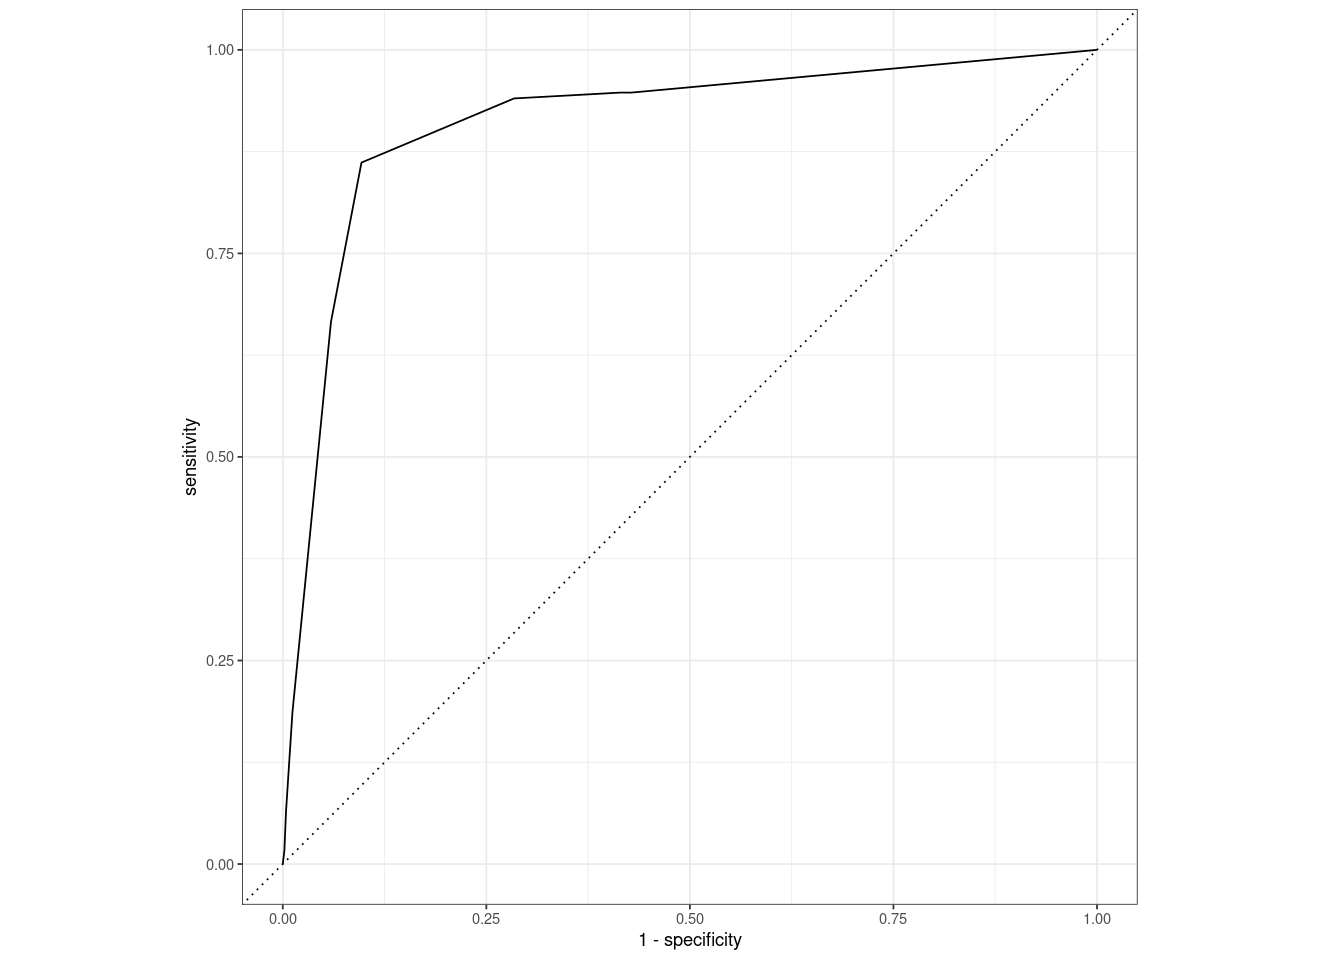

In [130]:
# Predict probabilities for each customer_status
decision_tree_predictions <- predict(decision_tree_fit, new_data = test_data, , type = "prob") %>%
  bind_cols(test_data)
decision_tree_predictions

# Plotting the ROC curve
decision_tree_roc_curve <- roc_curve(decision_tree_predictions, truth = customer_status, .pred_closed_account) %>%
  autoplot()
decision_tree_roc_curve

# Calculating the Area under Curve
decision_tree_auc <- roc_auc(decision_tree_predictions, truth = customer_status, .pred_closed_account)
decision_tree_auc

In [131]:
# Evaluate decision tree model
tree_predictions <- decision_tree_fit %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data)

# Precision
tree_precision <- tree_predictions %>%
  precision(truth = customer_status, estimate = .pred_class)

# Recall
tree_recall <- tree_predictions %>%
  recall(truth = customer_status, estimate = .pred_class)

# Accuracy
tree_accuracy <- tree_predictions %>%
  accuracy(truth = customer_status, estimate = .pred_class)

# F1 Score
tree_f1_score <- tree_predictions %>%
  f_meas(truth = customer_status, estimate = .pred_class)

# Sensitivity (True Positive Rate)
sensitivity <- tree_predictions %>%
  sensitivity(truth = customer_status, estimate = .pred_class)

# Specificity (True Negative Rate)
specificity <- tree_predictions %>%
  specificity(truth = customer_status, estimate = .pred_class)

# Confusion Matrix
tree_conf_matrix <- tree_predictions %>%
  conf_mat(truth = customer_status, estimate = .pred_class)

# Print the evaluation metrics for decision tree model
print(tree_precision)
print(tree_recall)
print(tree_accuracy)
print(tree_f1_score)
print(tree_conf_matrix)
print(sensitivity)
print(specificity)


# A tibble: 1 × 3
  .metric   .estimator .estimate
  <chr>     <chr>          <dbl>
1 precision binary         0.880
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 recall  binary         0.862
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.884
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 f_meas  binary         0.871
                Truth
Prediction       closed_account active
  closed_account            361     49
  active                     58    458
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 sensitivity binary         0.862
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 specificity binary         0.903


## Model 3 Training

In [132]:
# KNN model
knn_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 5, mode = "classification") %>%
  set_engine("kknn")

# Using the Feature engineering pipeline for the KNN model workflow
knn_model_workflow <- workflow() %>%
  add_recipe(credit_card_recipe) %>%
  add_model(knn_model)

# Fitting the workflow to the training data
knn_model_fit <- knn_model_workflow %>%
  fit(data = train_data)

## Model 3 Performance Evaluation

.pred_closed_account,.pred_active,customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0,0.0,closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
1.0,0.0,closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
0.0,1.0,active,46,4,masters,divorced,full_time,71585,gold,41,4,2,1,5397,0.433,0.670,4734,96,0.846
0.6,0.4,closed_account,55,2,masters,married,self_employed,54037,blue,49,3,3,4,1809,0.000,0.569,2123,44,0.571
0.2,0.8,active,47,1,associates,married,part_time,32071,gold,41,3,2,3,2950,0.557,0.800,4740,83,0.694
0.0,1.0,active,56,1,masters,married,self_employed,35908,gold,50,4,3,2,1584,0.828,0.867,4203,73,0.780
0.8,0.2,closed_account,49,4,masters,married,full_time,33543,gold,38,5,2,4,1757,0.000,0.890,2557,45,0.406
0.2,0.8,active,52,4,associates,married,full_time,68316,blue,36,6,3,2,2597,0.670,0.710,5037,80,0.778
0.2,0.8,active,50,2,bachelors,married,part_time,35351,blue,40,3,2,4,8416,0.184,0.643,13988,124,0.771


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9115039


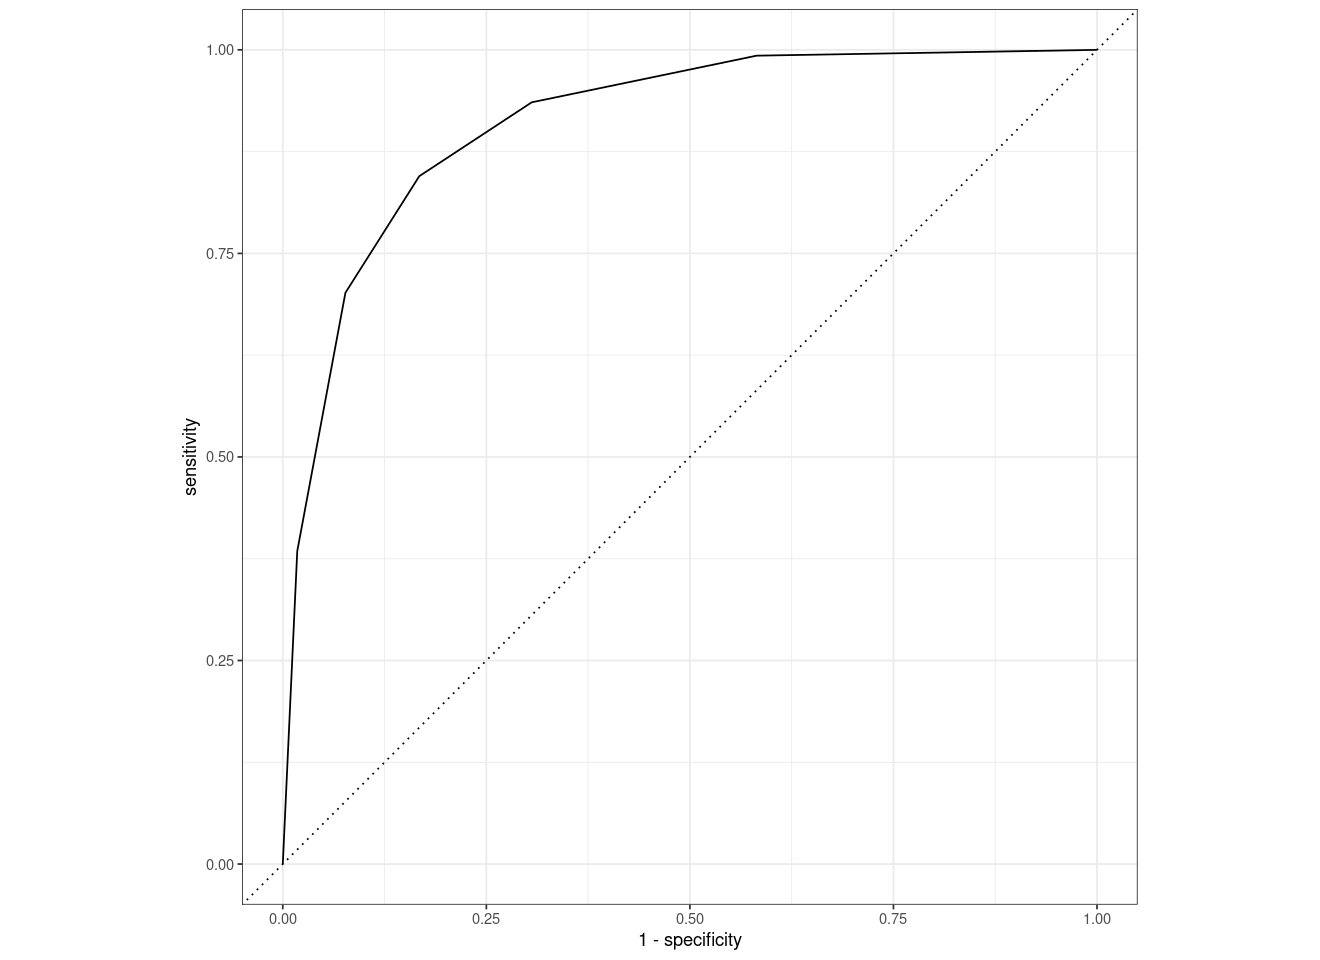

In [134]:
# Predict probabilities for each customer_status
knn_model_predictions <- predict(knn_model_fit, new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

knn_model_predictions
# Plotting the ROC curve 
knn_model_roc_curve <- roc_curve(knn_model_predictions, truth = customer_status, .pred_closed_account) %>%
  autoplot()
knn_model_roc_curve

# Calculating the Area under Curve
knn_model_auc <- roc_auc(knn_model_predictions, truth = customer_status, .pred_closed_account)
knn_model_auc

In [135]:
# Evaluate KNN model
knn_predictions <- knn_model_fit %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data)

# Precision
knn_precision <- knn_predictions %>%
  precision(truth = customer_status, estimate = .pred_class)

# Recall
knn_recall <- knn_predictions %>%
  recall(truth = customer_status, estimate = .pred_class)

# Accuracy
knn_accuracy <- knn_predictions %>%
  accuracy(truth = customer_status, estimate = .pred_class)

# F1 Score
knn_f1_score <- knn_predictions %>%
  f_meas(truth = customer_status, estimate = .pred_class)

# Sensitivity (True Positive Rate)
sensitivity <- knn_predictions %>%
  sensitivity(truth = customer_status, estimate = .pred_class)

# Specificity (True Negative Rate)
specificity <- knn_predictions %>%
  specificity(truth = customer_status, estimate = .pred_class)

# Confusion Matrix
knn_conf_matrix <- knn_predictions %>%
  conf_mat(truth = customer_status, estimate = .pred_class)

# Print the evaluation metrics
print(knn_precision)
print(knn_recall)
print(knn_accuracy)
print(knn_f1_score)
print(sensitivity)
print(specificity)
print(knn_conf_matrix)


# A tibble: 1 × 3
  .metric   .estimator .estimate
  <chr>     <chr>          <dbl>
1 precision binary         0.806
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 recall  binary         0.845
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.838
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 f_meas  binary         0.825
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 sensitivity binary         0.845
# A tibble: 1 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 specificity binary         0.832
                Truth
Prediction       closed_account active
  closed_account            354     85
  active                     65    422


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

As we delve into the presentation, we must first comprehend the most serious business issue banks face: customer retention. Understanding what drives customers' decisions to cancel their credit card accounts is critical in this day and age, when retaining client loyalty is critical for long-term success. Our investigation tries to identify such issues and make realistic recommendations to the bank to improve client retention and service.

## Key Findings

Through an extensive Exploratory Data Analysis (EDA) we were able to achieve a few important results. Initially, despite the fact there were variations among the card types distributed across closed and active accounts, it was clear that the card type might not be the sole factor involved in an account being closed. Other variables such as contact frequency, average months since the first account, number of dependents, and utilization ratio also played significant roles. Interestingly, customers who were contacted more frequently tended to have active accounts than the ones who weren’t contacted. This indicates that personalized communication tactics could improve customer retention. Furthermore, while there was a slight difference in the average months since the first account between closed and open accounts, this difference did not have a major impact on the customer’s decision to close their accounts. Similarly, the number of dependents did not exhibit a consistent pattern in relation to account closure. However, customers who closed their accounts typically exhibited a lower average utilization ratio, suggesting a possible correlation between account closure and utilization ratio.


## Modeling Results

With an accuracy of 86.1%, the logistic regression model demonstrated the highest performance out of all the classification models that were evaluated. The predictive accuracy of this model to determine if a customer would close their account will be vital to the proactive customer retention strategies of the bank. Using metrics such as precision, recall, and ROC AUC, the logistic regression model provides reliable predictions, enabling the bank to anticipate customer behavior and take preemptive measures.

## Recommendations

Based on our analysis, few recommendations can be made to improve customer retention and service at the bank:

Enhance Personalized Communication Strategies: Our analysis clearly shows that the customers who were contacted more frequently last year tend to keep their accounts open.
So, implementing personalized communication strategies according to the preferences and actions of the customers could play a major role in customer retention
Optimize Utilization Ratio Management: Since the utilization ratio is low among customers who close their account, it could be a good practice for the bank to educate their customers in optimizing their credit utilization. This could potentially help in mitigating the risk of account closure.

Targeted Promotional Offers: Create tailored promotional offers by categorizing customers based on characteristics such as contact frequency, utilization ratio, and account length. Promotions targeted towards specific customer groups can encourage them for their continued participation while preventing account closures at the same time.

In conclusion, the insights derived from our analysis provide a roadmap for the bank to navigate the complexities of customer retention effectively. By implementing these recommendations, the bank can foster long-term customer relationships and drive profitability.
